In [17]:
#datasets
#https://github.com/jbrownlee/Datasets/blob/master/README.md

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv"
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv"


#glassnames = [ "Id","RI", "Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
seednames = ["Area","Perimeter","Compactness","len_kernel","width_kernel","asymmetry coefficient","length of kernel groove","Class"]

dataset = pd.read_csv(url, names=seednames)
#dataset = pd.read_csv(url, names=glassnames)
#print(dataset.shape)
#print(dataset.describe())
print(dataset.head(5))
#print(dataset.groupby('class').size())



    Area  Perimeter  Compactness  len_kernel  width_kernel  \
0  15.26      14.84       0.8710       5.763         3.312   
1  14.88      14.57       0.8811       5.554         3.333   
2  14.29      14.09       0.9050       5.291         3.337   
3  13.84      13.94       0.8955       5.324         3.379   
4  16.14      14.99       0.9034       5.658         3.562   

   asymmetry coefficient  length of kernel groove  Class  
0                  2.221                    5.220    1.0  
1                  1.018                    4.956    1.0  
2                  2.699                    4.825    1.0  
3                  2.259                    4.805    1.0  
4                  1.355                    5.175    1.0  


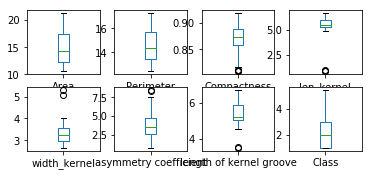

In [18]:
dataset.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

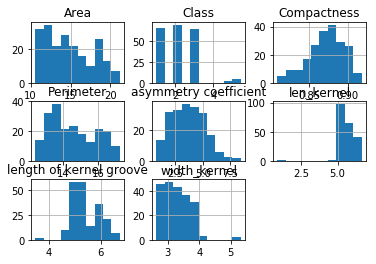

In [19]:
# histograms
dataset.hist()
plt.show()

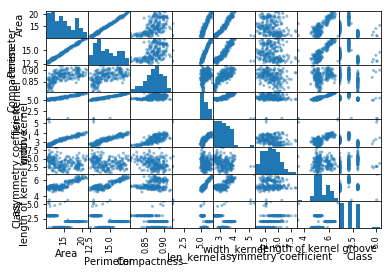

In [20]:
pd.plotting.scatter_matrix(dataset)
plt.show()

In [28]:
# Split-out validation dataset
print(len(dataset.columns))
dataset = dataset.dropna()
array = dataset.values
X = array[:,0:len(dataset.columns)-1]
Y = array[:,len(dataset.columns)-1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
# Test options and evaluation metric
print(X_train)
print(Y_train)


8
[[11.82   13.4     0.8274 ...  2.777   4.471   5.178 ]
 [18.65   16.41    0.8698 ...  3.594   4.391   6.102 ]
 [14.11   14.18    0.882  ...  3.221   2.754   5.038 ]
 ...
 [13.02   13.76    0.8641 ...  3.026   3.373   4.825 ]
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [12.89   13.77    0.8541 ...  3.026   6.185   5.316 ]]
[3. 2. 1. 1. 3. 1. 3. 1. 1. 2. 3. 3. 1. 1. 2. 3. 2. 2. 1. 3. 3. 1. 1. 2.
 2. 3. 1. 3. 3. 2. 2. 2. 1. 2. 3. 2. 1. 1. 1. 2. 3. 3. 2. 1. 1. 1. 2. 1.
 1. 3. 2. 1. 2. 3. 3. 2. 3. 2. 1. 3. 2. 2. 2. 1. 1. 1. 1. 2. 3. 2. 1. 2.
 3. 1. 3. 1. 3. 1. 1. 1. 1. 1. 3. 2. 2. 1. 2. 2. 3. 1. 1. 1. 3. 2. 1. 3.
 2. 3. 2. 1. 3. 1. 3. 3. 3. 2. 3. 2. 3. 3. 1. 1. 1. 3. 2. 3. 2. 2. 3. 1.
 2. 3. 2. 3. 1. 1. 3. 1. 2. 3. 1. 2. 1. 1. 1. 1. 2. 1. 3. 3. 2. 3. 2. 3.
 3. 1. 2. 2. 2. 1. 3. 3. 2. 2. 3. 2. 1. 3. 3.]


In [29]:
# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('MLPC', MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(7, 11), random_state=1)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	print(name)
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR
LR: 0.937500 (0.073951)
LDA
LDA: 0.981250 (0.028641)
KNN
KNN: 0.893750 (0.079304)
CART
CART: 0.924583 (0.046676)
NB
NB: 0.905417 (0.032170)
SVM
SVM: 0.912500 (0.063738)
MLPC


C:\Users\Xavi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Xavi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


MLPC: 0.912083 (0.049807)


In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[10  0  0  0  0  0]
 [ 0 22  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  5]]
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      1.00      1.00        22
        3.0       1.00      1.00      1.00         3
        5.0       1.00      1.00      1.00         2
        6.0       1.00      1.00      1.00         1
        7.0       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        43



In [16]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(7, 11), random_state=1)
nn.fit(X_train, Y_train)
predictions=nn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9534883720930233
[[10  0  0  0  0  0]
 [ 0 22  0  0  0  0]
 [ 0  0  2  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  5]]
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      1.00      1.00        22
        3.0       1.00      0.67      0.80         3
        5.0       0.67      1.00      0.80         2
        6.0       0.00      0.00      0.00         1
        7.0       0.83      1.00      0.91         5

avg / total       0.94      0.95      0.94        43



C:\Users\Xavi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
